In [196]:
import torch
from torch import nn
import torchvision
from torchvision.transforms import ToTensor
from torchvision import datasets

import matplotlib.pyplot as plt

In [197]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Write transform for image
data_tramsform = transforms.Compose([
                 # Resize image fo 64x64
                 transforms.Resize(size=(64, 64)),
                 # Flip the image randomly on the horizontal
                 transforms.RandomHorizontalFlip(p=0.5),
                 # Turn the image to torch.Tensor
                 transforms.ToTensor()
])



In [198]:
# Prepeare data

# Train data sets after reshape
train_data_reshape = datasets.Food101(root="data",
                              split="train",
                              transform=data_tramsform,
                              download=True,
                              target_transform=None)

# Test data sets after reshape
test_data_reshape = datasets.Food101(root="data",
                             split="train",
                             transform=data_tramsform,
                             download=True,
                             target_transform=None)

# Train data sets
train_data = datasets.Food101(root="data",
                              split="train",
                              transform=ToTensor(),
                              download=False,
                              target_transform=None)

# Test data sets
test_data = datasets.Food101(root="data",
                            split="train",
                            transform=ToTensor(),
                            download=False,
                            target_transform=None)

In [199]:
class_idx = train_data.class_to_idx
class_idx

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [200]:
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

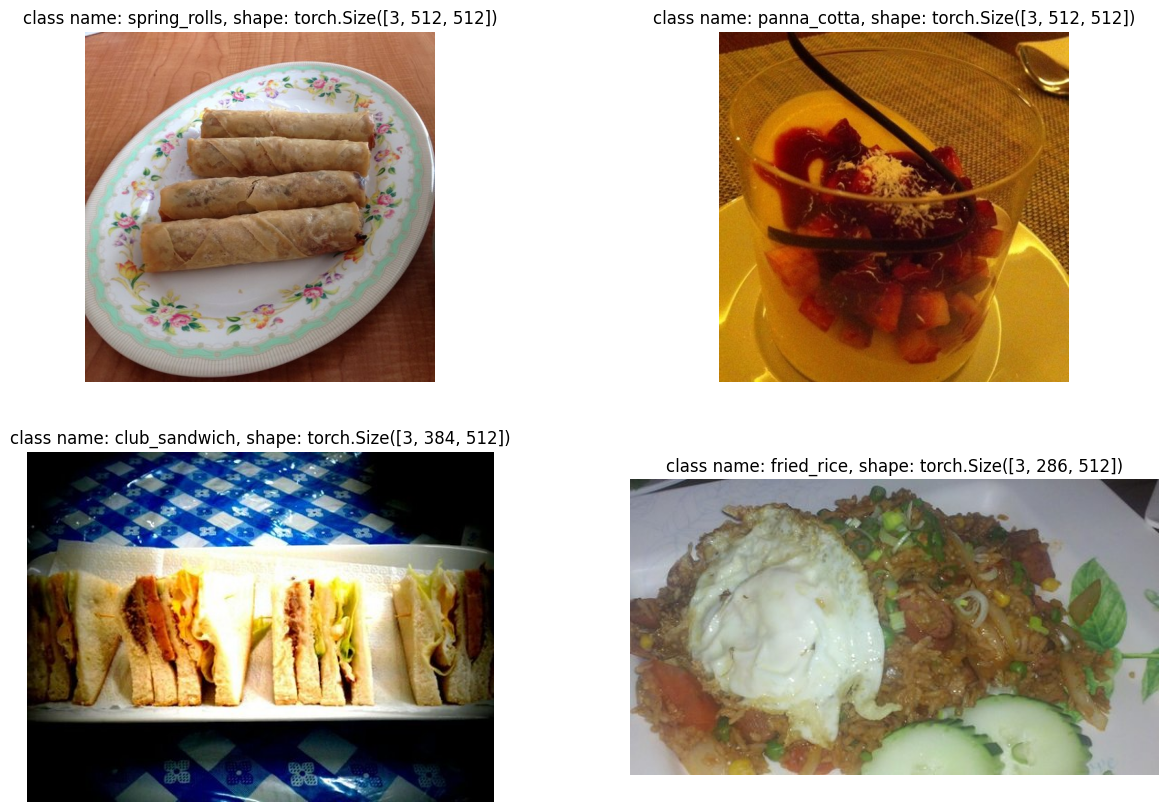

In [201]:
import torch
import matplotlib.pyplot as plt

# Plot random samples
fig = plt.figure(figsize=(15, 10))

rows, cols = 2, 2

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, idx = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(f"class name: {class_names[idx]}, shape: {img.shape}")
    plt.axis(False)


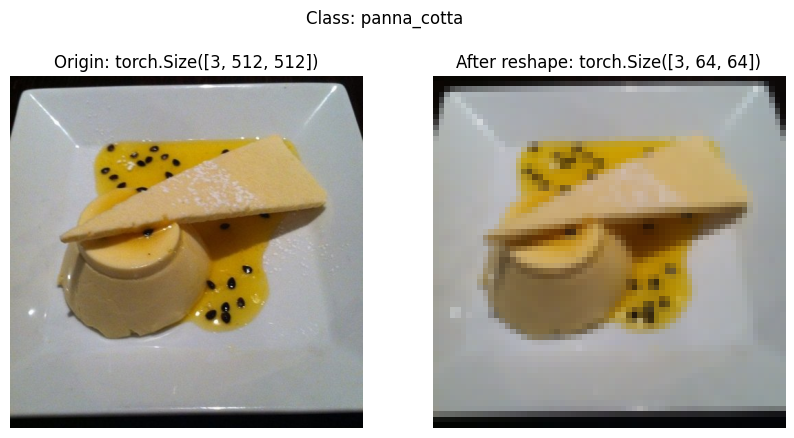

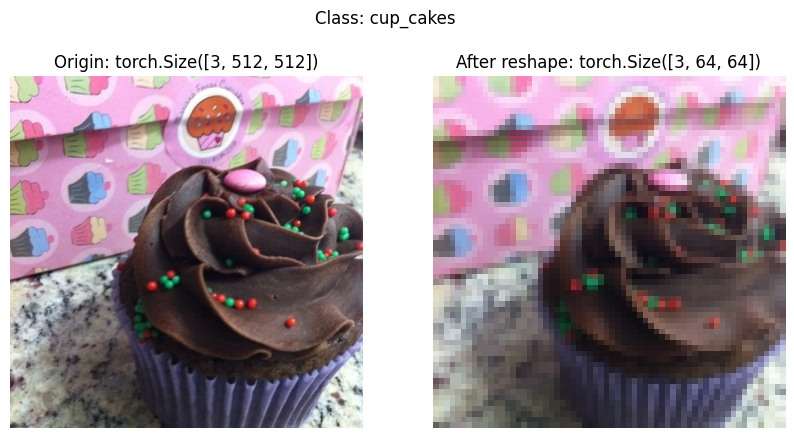

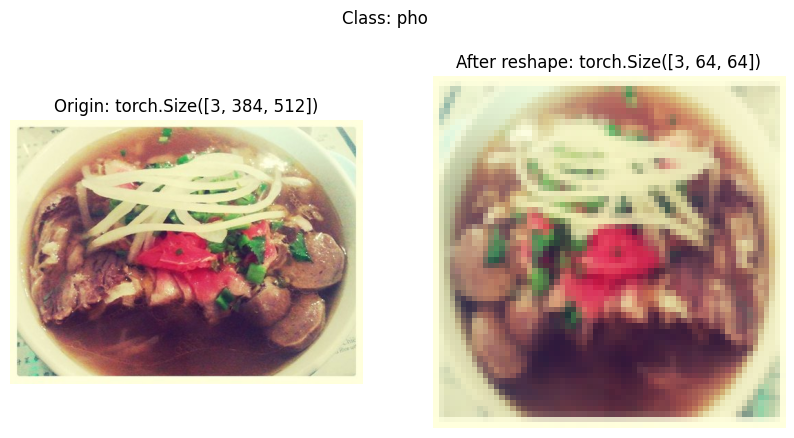

In [202]:
rows = 3

for i in range(rows):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    img, label = train_data[random_idx]
    ax[0].imshow(img.permute(1, 2, 0))
    ax[0].set_title(f"Origin: {img.shape}")
    ax[0].axis(False)

    img, label = train_data_reshape[random_idx]
    ax[1].imshow(img.permute(1, 2, 0))
    ax[1].set_title(f"After reshape: {img.shape}")
    ax[1].axis(False)

    fig.suptitle(f"Class: {class_names[label]}")

plt.show()


In [203]:
from torch.utils.data import DataLoader
# Make data loader
BATCHSIZE = 32

train_dataloader = DataLoader(dataset=train_data_reshape,
                              batch_size=BATCHSIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data_reshape,
                             batch_size=BATCHSIZE,
                             shuffle=False)

In [204]:
first_batch = next(iter(train_dataloader))
first_batch_data = first_batch[0]
print(first_batch_data.shape)

torch.Size([32, 3, 64, 64])


In [205]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [206]:
import requests
from pathlib import Path

# Download helper fun from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_function allredy exist and skip download")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

helper_function allredy exist and skip download


In [207]:
from tqdm.auto import tqdm
### testing model function

torch.manual_seed(42)

def eval_model(model, data_loader, loss_fn, accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.no_grad():
        for X, y in tqdm(data_loader):
            # Move data to device
            X, y = X.to(device), y.to(device)

            # Make prediction
            y_pred = model(X)

            # Calculate loss and accuracy
            loss += loss_fn(y_pred, y).item()
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Average loss and accuracy
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss,
            "model_acc": acc}

In [208]:
### Function for time compilation
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Print difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f}")
  return total_time

In [209]:
### Tran step
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn,
               device: torch.device = device):
  model = model.to(device)
  ### traiing mode
  model.train()
  # Loop on data (batches)
  for batch, (X, y) in tqdm(enumerate(data_loader)):
    train_loss, train_acc = 0, 0
    # mova data to device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred = model(X)
    # Calcualte a loss and acc
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += acc_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))
    # gradient decent
    optimizer.zero_grad()
    # bacward propagation
    loss.backward()
    # update
    optimizer.step()
    # print result
    if batch % 400 == 0:
      print(f"Looked at: {batch*len(X)}/{len(data_loader.dataset)}")

  # divide loss and acc per len of data
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"train loss: {train_loss:.5f} | acc loss: {train_acc:.2f}")

In [210]:
### Test step
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              acc_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  # turn off gradient decent
  with torch.inference_mode():
    for test_X, test_y in data_loader:
      # Move data to device
      test_X, test_y = test_X.to(device), test_y.to(device)
      # Forward pass
      test_pred = model(test_X)
      # calualte a loss/acc
      test_loss += loss_fn(test_pred, test_y)
      test_acc += acc_fn(y_true=test_y,
                         y_pred=test_pred.argmax(dim=1))

    # divide loss and acc per len of data
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"test loss: {test_loss:.5f} | acc lose: {test_acc:.2f}")


In [211]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=101, bias=True)
  )
)

torch.Size([32, 3, 64, 64])
torch.Size([64, 64, 3])


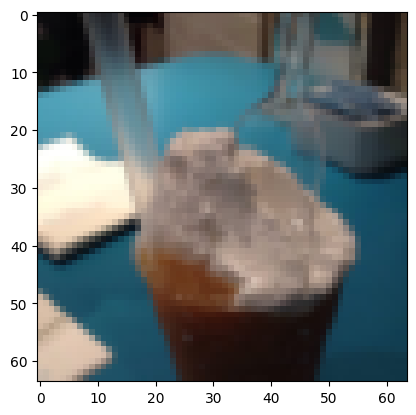

In [212]:
cos = next(iter(train_dataloader))[0]
print(cos.size())
# Selecting the first image from the batch
first_image = cos[0].permute(1, 2, 0)
print(first_image.shape)

# Assuming `first_image` is a tensor representing an image, and you want to visualize it
plt.imshow(first_image)  # Assuming the tensor is in (channels, height, width) format
plt.show()


In [213]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.01)

# define epochs number
epochs = 3

start_linear_model = timer()
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n------------")
  train_step(model=model_0,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,  # Poprawione: zmiana nazwy argumentu na "optimizer"
            acc_fn=accuracy_fn,
            device='cuda' if torch.cuda.is_available() else 'cpu')

  test_step(model=model_0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            acc_fn=accuracy_fn,
            device='cuda' if torch.cuda.is_available() else 'cpu')
stop_linear_model = timer()

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
------------


0it [00:00, ?it/s]

Looked at: 0/75750
Looked at: 12800/75750
Looked at: 25600/75750
Looked at: 38400/75750
Looked at: 51200/75750
Looked at: 64000/75750
train loss: 0.00194 | acc loss: 0.01
test loss: 4.61985 | acc lose: 0.99
epoch: 1
------------


0it [00:00, ?it/s]

Looked at: 0/75750
Looked at: 12800/75750
Looked at: 25600/75750
Looked at: 38400/75750
Looked at: 51200/75750
Looked at: 64000/75750
train loss: 0.00196 | acc loss: 0.00
test loss: 4.61921 | acc lose: 0.99
epoch: 2
------------


0it [00:00, ?it/s]

Looked at: 0/75750
Looked at: 12800/75750
Looked at: 25600/75750
Looked at: 38400/75750
Looked at: 51200/75750
Looked at: 64000/75750
train loss: 0.00195 | acc loss: 0.00
test loss: 4.61953 | acc lose: 0.99


In [216]:
result = eval_model(model=model_0,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn)

  0%|          | 0/2368 [00:00<?, ?it/s]

In [217]:
print(result)

{'model_name': 'TinyVGG', 'model_loss': 4.619522978727882, 'model_acc': 0.9897592905405406}
